# Import Dependencies  

In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 12.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
!pip install tensorflow

In [ ]:
!pip install numpy==1.23.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 58.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
bigframes 1.42.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you 

In [2]:
!pip install --upgrade --force-reinstall gensim tensorflow

  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached tensorflow-2.19.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached smart_open-7.1.0-py3-none-any.whl.metadata (24 kB)
  Using cached absl_py-2.2.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-manylinux2010_x86_64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cach

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('stopwords')

from wordcloud import WordCloud
from collections import Counter
from gensim.models import Word2Vec, KeyedVectors

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, SimpleRNN, GRU, Bidirectional, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Load Dataset

In [7]:
df = pd.read_csv("/content/clashofclans_review.csv")
df.head()

,Rating,Date,Helpful Count,Review,sentimen
0,4,2025-03-31 11:27:26,11,"After a several years i played this game, i ha...",Positive
1,3,2025-04-10 11:04:54,2,I love this game. I played this game since 201...,Positive
2,4,2025-03-31 13:50:20,2,The fact that this game is now playable on PC ...,Positive
3,5,2025-04-06 06:57:31,8,A very tactical game which despite having micr...,Positive
4,5,2025-02-12 08:23:26,51,The best game i've ever played!! i don't know ...,Positive


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rating         11000 non-null  int64 
 1   Date           11000 non-null  object
 2   Helpful Count  11000 non-null  int64 
 3   Review         11000 non-null  object
 4   sentimen       11000 non-null  object
dtypes: int64(2), object(3)
memory usage: 429.8+ KB


In [9]:
df.shape

(11000, 5)

In [10]:
df.columns

Index(['Rating', 'Date', 'Helpful Count', 'Review', 'sentimen'], dtype='object')

# Data Preprocessing

In [11]:
print(f"Data Duplicated : {df.duplicated().sum()}")
df.isnull().sum()

Data Duplicated : 0


,0
Rating,0
Date,0
Helpful Count,0
Review,0
sentimen,0


## Text Preprocessing

Sekarang kita akan membersihkan Review pada Dataset diantaranya:
1. `cleaningText(text)`: Menghapus emoji, hastag, mention, URL, angka, tanda baca, mengganti newline dgn spasi, hapus spasi depan-belakang.

2. `casefoldingText(text)`: Mengkonversi semua kata menjadi huruf kecil (lowercase) agar seragam.

3. `tokenizingText(text)`: Memecah kalimat menjadi kata-kata (token).

4. `filteringText(text)`: Menghapus stopword, yaitu kata-kata umum yang tidak penting dalam analisis.

5. `lemmatizerText(text)`: Mengubah kata-kata dalam teks menjadi bentuk lema atau bentuk dasar kata menggunakan teknik lemmatization.

6. `toSentence(list_words)`: Menggabungkan daftar kata menjadi sebuah kalimat yang utuh.

In [12]:
def cleaningText(text):
  text = re.sub(r'[^\x00-\x7F]+', '', text)   # hapus emoji
  text = re.sub(r'#\w+', '', text)            # hapus hashtag
  text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # hapus mention
  text = re.sub(r'https?:\/\/\S+', '', text)  # hapus URL
  text = re.sub(r'[0-9]+', ' ', text)         # hapus angka
  text = text.translate(str.maketrans('', '', string.punctuation))  # hapus tanda baca
  text = text.replace('\n', ' ')              # ganti newline dengan spasi
  text = text.strip(' ')                      # hapus spasi depan-belakang
  return text

def casefoldingText(text):
  return text.lower()

def tokenizingText(text):
  return word_tokenize(text)

def filteringText(text):
  stop_words = set(stopwords.words('english'))
  return [word for word in text if word not in stop_words]

# LemmatizerText
lemmatizer = WordNetLemmatizer()
word_cache = {}

def lemmatizerText(text):
    lemmatized_words = []
    for word in text:
        if word in word_cache:
            lemmatized_words.append(word_cache[word])
        else:
            lemma = lemmatizer.lemmatize(word, pos='v')
            word_cache[word] = lemma
            lemmatized_words.append(lemma)
    return lemmatized_words


def toSentence(list_words):
    return ' '.join(list_words)

In [15]:
# Membersihkan teks (hapus mention, hashtag, url, angka, tanda baca, emoji, dsb.)
df['clean'] = df['Review'].apply(cleaningText)

# Konversi semua karakter jadi huruf kecil (casefolding)
df['clean'] = df['clean'].apply(casefoldingText)

# Tokenisasi: pisah kalimat jadi kata-kata (token)
df['tokens'] = df['clean'].apply(tokenizingText)

# Filter: hapus stopwords
df['filtered'] = df['tokens'].apply(filteringText)

# Lemmatizer
df['lemmatized'] = df['filtered'].apply(lemmatizerText)

# Ubah List menjadi Kalimat
df['final'] = df['lemmatized'].apply(toSentence)

In [16]:
df.head()

,Rating,Date,Helpful Count,Review,sentimen,clean,tokens,filtered,lemmatized,final
0,4,2025-03-31 11:27:26,11,"After a several years i played this game, i ha...",Positive,after a several years i played this game i hav...,"[after, a, several, years, i, played, this, ga...","[several, years, played, game, conclusion, gam...","[several, years, play, game, conclusion, game,...",several years play game conclusion game offer ...
1,3,2025-04-10 11:04:54,2,I love this game. I played this game since 201...,Positive,i love this game i played this game since th...,"[i, love, this, game, i, played, this, game, s...","[love, game, played, game, since, new, develop...","[love, game, play, game, since, new, developme...",love game play game since new development good...
2,4,2025-03-31 13:50:20,2,The fact that this game is now playable on PC ...,Positive,the fact that this game is now playable on pc ...,"[the, fact, that, this, game, is, now, playabl...","[fact, game, playable, pc, pleasing, one, inco...","[fact, game, playable, pc, please, one, inconv...",fact game playable pc please one inconvenience...
3,5,2025-04-06 06:57:31,8,A very tactical game which despite having micr...,Positive,a very tactical game which despite having micr...,"[a, very, tactical, game, which, despite, havi...","[tactical, game, despite, micro, transactions,...","[tactical, game, despite, micro, transactions,...",tactical game despite micro transactions isnt ...
4,5,2025-02-12 08:23:26,51,The best game i've ever played!! i don't know ...,Positive,the best game ive ever played i dont know why ...,"[the, best, game, ive, ever, played, i, dont, ...","[best, game, ive, ever, played, dont, know, ga...","[best, game, ive, ever, play, dont, know, game...",best game ive ever play dont know game grow la...


# Visualisasi

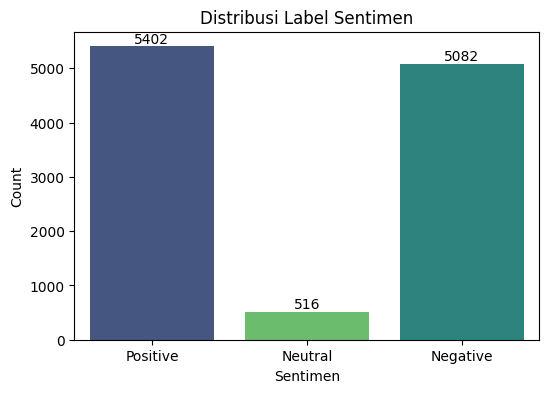

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df,
              x='sentimen',
              order=['Positive', 'Neutral', 'Negative'],
              palette='viridis',
              hue='sentimen',
              legend=False)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=10)
plt.title('Distribusi Label Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Count')
plt.show()

Terjadi class imbalance yang cukup signifikan, terutama pada kelas "Neutral", yang sangat kecil dibanding dua lainnya.

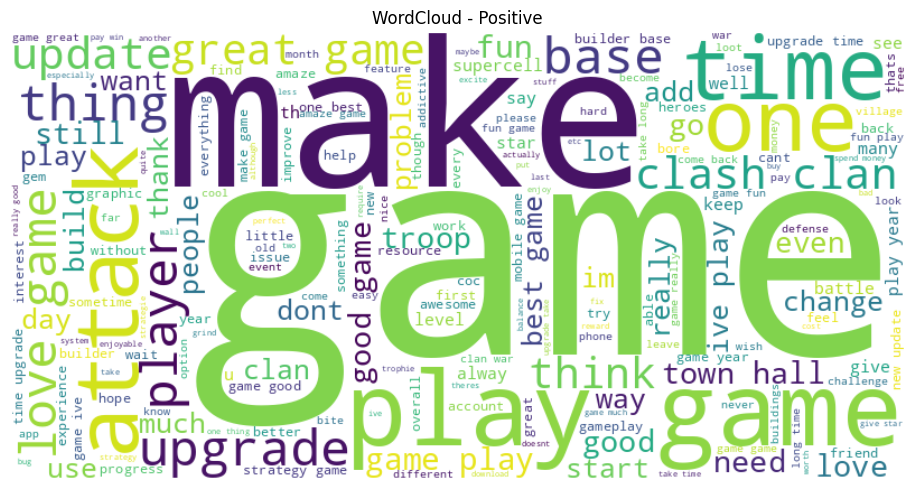

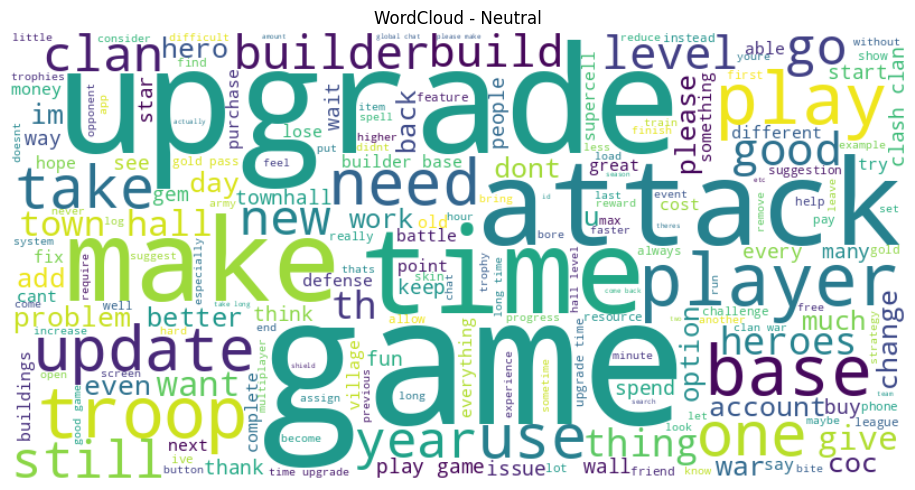

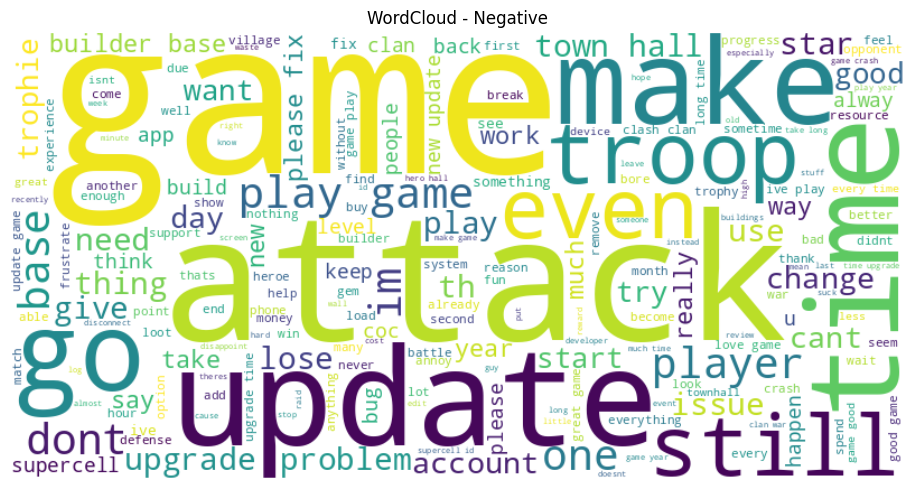

In [ ]:
for label in ['Positive', 'Neutral', 'Negative']:
    # Gabungkan semua teks dari satu label jadi satu string besar
    text = ' '.join(df[df['sentimen'] == label]['final'].astype(str))

    # Generate WordCloud dari kumpulan kata
    wc = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='viridis',  # opsional: bisa ubah gaya warna
        max_words=200
    ).generate(text)

    # Tampilkan WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud - {label}')
    plt.tight_layout()
    plt.show()

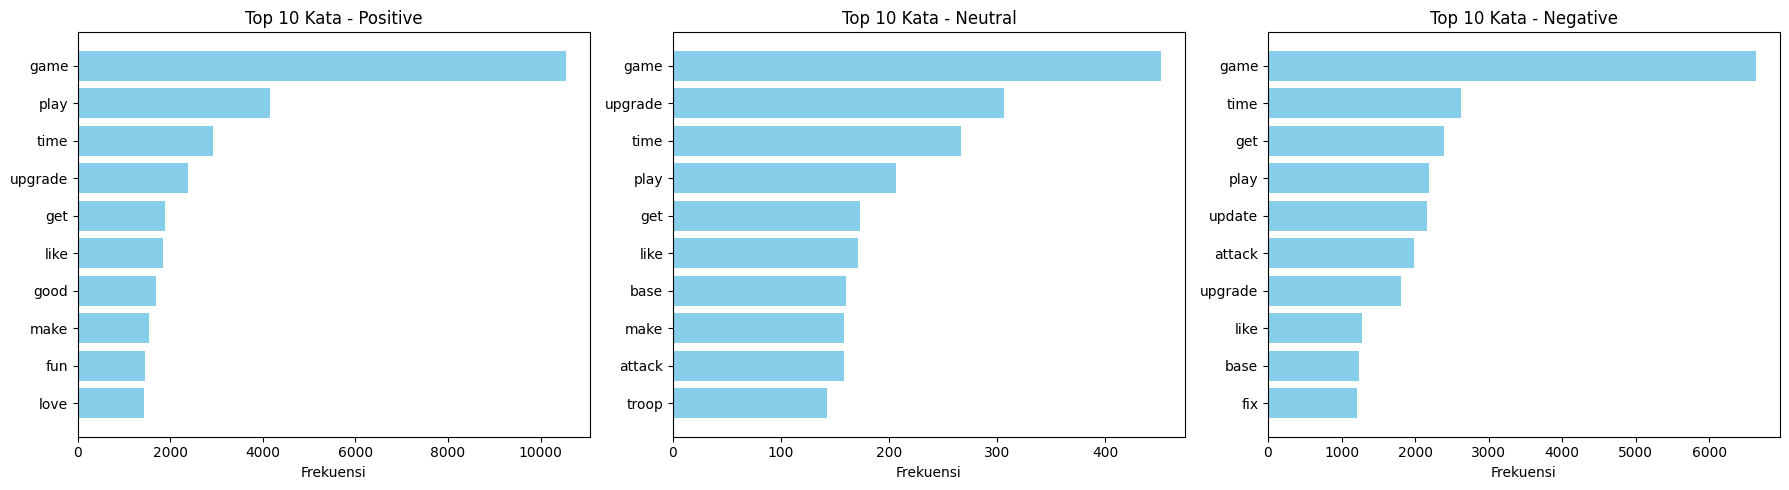

In [ ]:
top_n = 10

# Siapkan plot 3 kolom
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sentimen_list = ['Positive', 'Neutral', 'Negative']

for i, label in enumerate(sentimen_list):
    # Gabungkan semua teks dalam satu sentimen
    all_words = ' '.join(
    df[df['sentimen'] == label]['final']
    .dropna()
    .astype(str)
).split()
    # Hitung frekuensi kata
    counter = Counter(all_words)
    common_words = counter.most_common(top_n)

    words, counts = zip(*common_words)

    axes[i].barh(words, counts, color='skyblue')
    axes[i].invert_yaxis()  # Biar urut dari paling banyak ke paling sedikit
    axes[i].set_title(f"Top {top_n} Kata - {label}")
    axes[i].set_xlabel("Frekuensi")

plt.tight_layout()
plt.show()

Kata-kata yang mendominasi pada masing-masing sentimen sudah sesuai

# Ektraksi Fitur

In [17]:
# Data Splitting

X = df['final']
y = df['sentimen']

In [18]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

## TF-IDF

In [20]:
vectorize = TfidfVectorizer(max_features=5000)

X_tfidf = vectorize.fit_transform(X)

In [21]:
# Menangani Imbalance pada Sentimen untuk TF-IDF
sm_tfidf = SMOTE(random_state=42)
X_resampled_tfidf, y_resampled_tfidf = sm_tfidf.fit_resample(X_tfidf, y)

## Word Embedding (Word2Vec)

In [24]:
df['tokens'] = df['final'].apply(lambda x: x.split())
model_w2v = Word2Vec(
    sentences=df['tokens'],       # List of token
    vector_size=100,              # Panjang vektor
    window=5,                     # Jarak konteks
    min_count=2,                  # Hanya kata yang muncul ≥ 2 kali
    workers=4,
    sg=1                          # Gunakan skip-gram
)

In [25]:
def get_w2v_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if not vectors:
        return np.zeros(model.vector_size)
    return np.mean(vectors, axis=0)

X_w2v = np.array([get_w2v_vector(tokens, model_w2v) for tokens in df['tokens']])

In [26]:
# Menangani Imbalance pada Sentimen untuk Word2Vec
sm_w2v = SMOTE(random_state=42)
X_resampled_w2v, y_resampled_w2v = sm_w2v.fit_resample(X_w2v, y)

## FastText

In [ ]:
!wget "https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip"
!unzip -q "wiki-news-300d-1M.vec.zip"

--2025-04-14 13:34:22--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.165.160.106, 3.165.160.120, 3.165.160.69, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.165.160.106|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 681808098 (650M) [application/zip]
Saving to: ‘wiki-news-300d-1M.vec.zip’

wiki-news-300d-1M.v 100%[===================>] 650.22M  10.1MB/s    in 27s     

2025-04-14 13:34:49 (24.4 MB/s) - ‘wiki-news-300d-1M.vec.zip’ saved [681808098/681808098]



In [ ]:
fasttext_model = KeyedVectors.load_word2vec_format("wiki-news-300d-1M.vec", binary=False)

In [ ]:
def get_fasttext_vector(text, model, dim=300):
    words = text.lower().split()
    vectors = [model[word] for word in words if word in model]
    if len(vectors) == 0:
        return np.zeros(dim)  # jika tidak ada kata yang dikenal
    return np.mean(vectors, axis=0)

In [ ]:
X_vectors = np.array([get_fasttext_vector(text, fasttext_model) for text in X])

# Percobaan Skema

## Skema 1
* Model: SVM
* Ekstraksi fitur: TF-IDF
* Pembagian data: 80/20

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled_tfidf, y_resampled_tfidf, test_size=0.2, random_state=42, stratify=y_resampled_tfidf)

In [ ]:
model_svm = LinearSVC(class_weight='balanced')
model_svm.fit(X_train, y_train)

LinearSVC(class_weight='balanced')

In [ ]:
# Akurasi Training Set
y_pred_train = model_svm.predict(X_train)
accuracy_train_sk1 = accuracy_score(y_train, y_pred_train)
print("Akurasi Training Set:", accuracy_train_sk1)

# Akurasi Testing Set
y_pred = model_svm.predict(X_test)
accuracy_test_sk1 = accuracy_score(y_test, y_pred)
print("Akurasi Testing Set:", accuracy_test_sk1)

Akurasi Training Set: 0.951095340944153
Akurasi Testing Set: 0.8608883405305368


## Skema 2
* Model: Random Forest
* Fitur: Word2Vec
* Split: 80% training / 20% testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled_w2v, y_resampled_w2v, test_size=0.2, random_state=42, stratify=y_resampled_w2v)

In [ ]:
model_rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42, class_weight='balanced')
model_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
# Akurasi Training Set
y_pred_train = model_rf.predict(X_train)
accuracy_train_sk3 = accuracy_score(y_train, y_pred_train)
print("Akurasi Training Set:", accuracy_train_sk3)

# Akurasi Testing Set
y_pred = model_rf.predict(X_test)
accuracy_test_sk3 = accuracy_score(y_test, y_pred)
print("Akurasi Testing Set:", accuracy_test_sk3)

Akurasi Training Set: 0.999922863313792
Akurasi Testing Set: 0.8587291795188156


## Skema 3
* Model: LTSM dan GRU
* Fitur: FastText


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [ ]:
X_seq = tokenizer.texts_to_sequences(X)

In [ ]:
X_pad = pad_sequences(X_seq, maxlen=500)

In [ ]:
def embedding_matrix(model, word_index, dim=300):
    matrix = np.zeros((len(word_index) + 1, dim))
    for word, i in word_index.items():
        if word in model:
            matrix[i] = model[word]
    return matrix

# Ambil embedding matrix FastText
embedding_matrix = embedding_matrix(fasttext_model, tokenizer.word_index)

### LTSM

In [ ]:
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=300, weights=[embedding_matrix], input_length=100, trainable=False))
model_lstm.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))  # LSTM layer
model_lstm.add(Dense(3, activation='softmax'))  # 3 kelas: Positive, Negative, Neutral
model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Latih model LSTM
model_lstm.fit(X_pad, y, epochs=5, batch_size=64, validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
138/138 ━━━━━━━━━━━━━━━━━━━━ 344s 2s/step - accuracy: 0.6311 - loss: 0.7882 - val_accuracy: 0.7786 - val_loss: 0.5829
Epoch 2/5
138/138 ━━━━━━━━━━━━━━━━━━━━ 314s 2s/step - accuracy: 0.7798 - loss: 0.5728 - val_accuracy: 0.7836 - val_loss: 0.5517
Epoch 3/5
138/138 ━━━━━━━━━━━━━━━━━━━━ 325s 2s/step - accuracy: 0.7992 - loss: 0.5249 - val_accuracy: 0.7645 - val_loss: 0.5353
Epoch 4/5
138/138 ━━━━━━━━━━━━━━━━━━━━ 316s 2s/step - accuracy: 0.7984 - loss: 0.5006 - val_accuracy: 0.8105 - val_loss: 0.4730
Epoch 5/5
138/138 ━━━━━━━━━━━━━━━━━━━━ 306s 2s/step - accuracy: 0.8073 - loss: 0.4851 - val_accuracy: 0.8091 - val_loss: 0.4775


### GRU

In [ ]:
model_gru = Sequential()
model_gru.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=300, weights=[embedding_matrix], input_length=100, trainable=False))
model_gru.add(GRU(100, dropout=0.2, recurrent_dropout=0.2))  # GRU layer
model_gru.add(Dense(3, activation='softmax'))  # 3 kelas: Positive, Negative, Neutral
model_gru.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Latih model GRU
model_gru.fit(X_pad, y, epochs=10, batch_size=64, validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 305s 2s/step - accuracy: 0.5970 - loss: 0.8296 - val_accuracy: 0.7595 - val_loss: 0.5841
Epoch 2/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 316s 2s/step - accuracy: 0.7806 - loss: 0.5840 - val_accuracy: 0.7918 - val_loss: 0.5161
Epoch 3/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 322s 2s/step - accuracy: 0.8074 - loss: 0.5232 - val_accuracy: 0.7986 - val_loss: 0.4995
Epoch 4/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 320s 2s/step - accuracy: 0.8127 - loss: 0.4868 - val_accuracy: 0.8164 - val_loss: 0.4647
Epoch 5/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 324s 2s/step - accuracy: 0.8207 - loss: 0.4515 - val_accuracy: 0.8314 - val_loss: 0.4346
Epoch 6/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 316s 2s/step - accuracy: 0.8299 - loss: 0.4315 - val_accuracy: 0.8323 - val_loss: 0.4087
Epoch 7/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 283s 2s/step - accuracy: 0.8402 - loss: 0.4092 - val_accuracy: 0.8341 - val_loss: 0.4095
Epoch 8/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 327s 2s/step - accuracy: 0.8469 - loss: 0.3919 - val_accu

# Test Data Baru

Model SVM (Support Vector Machine) dipilih karena memiliki akurasi tertinggi dibandingkan dengan model lainnya. Meskipun ada beberapa model lain yang diuji, SVM menunjukkan kinerja terbaik dalam hal prediksi

## Test 1

In [41]:
new_review = input("Input your review: ")

# Text Preprocessing
new_review = casefoldingText(new_review)
new_review = tokenizingText(new_review)
new_review = filteringText(new_review)
new_review = lemmatizerText(new_review)
new_review = toSentence(new_review)

# TF-IDF
new_review_tfidf = vectorize.transform([new_review])

# Prediksi
prediction = model_svm.predict(new_review_tfidf)
predicted_label = label_encoder.inverse_transform(prediction)

print("Hasil Prediksi:", predicted_label)

Input your review: The updates keep things exciting, with new features that add depth to the gameplay. There are challenges, but they push you to strategize and improve. The community is active, and the game remains fun and engaging. Definitely worth playing if you're into strategy games!
Hasil Prediksi: ['Positive']


## Test 2

In [39]:
new_review = input("Input your review: ")

# Text Preprocessing
new_review = casefoldingText(new_review)
new_review = tokenizingText(new_review)
new_review = filteringText(new_review)
new_review = lemmatizerText(new_review)
new_review = toSentence(new_review)

# TF-IDF
new_review_tfidf = vectorize.transform([new_review])

# Prediksi
prediction = model_svm.predict(new_review_tfidf)
predicted_label = label_encoder.inverse_transform(prediction)

print("Hasil Prediksi:", predicted_label)

Input your review: I started playing in 2015, and despite some ups and downs, I’m still playing. The recent updates have made it more of a pay-to-play game if you want to progress. Frequent changes are discouraging new players and making it harder to keep clans active.
Hasil Prediksi: ['Neutral']


## Test 3

In [40]:
new_review = input("Input your review: ")

# Text Preprocessing
new_review = casefoldingText(new_review)
new_review = tokenizingText(new_review)
new_review = filteringText(new_review)
new_review = lemmatizerText(new_review)
new_review = toSentence(new_review)

# TF-IDF
new_review_tfidf = vectorize.transform([new_review])

# Prediksi
prediction = model_svm.predict(new_review_tfidf)
predicted_label = label_encoder.inverse_transform(prediction)

print("Hasil Prediksi:", predicted_label)

Input your review: I've been playing since 2015, but recent updates have made the game frustrating. It’s becoming more pay-to-play, and it’s hard to progress without spending money. The constant changes are discouraging new players and making it difficult to maintain an active clan. It's not as enjoyable as it used to be.
Hasil Prediksi: ['Negative']
